<h1> <center> Projeto ED - Topic E - Spam </center> </h1>

<h2> <center> Fernando Lopes	N.º 106358 <br>Maria Sousa	N.º 109488<br>Paulo Pinho	N.º 71734   </center></h2>

### Introduction
In this project we will use the database "spambase" and will use three different classifiers: Random forest, Artificial Neural Networks and Logistic regression.
***

### Step 1 - Import the database.

In [106]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#randomgenerator
import random as rd

# Splitter
from sklearn.model_selection import train_test_split
#Artificial Neural Networks
from sklearn.neural_network import MLPClassifier
# Logistic Regression
from sklearn.linear_model import LogisticRegression
#Random forest
from sklearn.ensemble import RandomForestClassifier
# import the metrics class
from sklearn import metrics

df1 = pd.read_csv('spambase.data', header=None)
df1.columns=["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove","word_freq_internet","word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report","word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email","word_freq_you", "word_freq_credit", "word_freq_your","word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology","word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project","word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$","char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", "Binary_Spam"]
print("The database has ", df1.shape[1], "features and ", df1.shape[0], "examples.\n\n")
print(df1.head())

The database has  58 features and  4601 examples.


   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00 

***
### Step 2 - Calculate the correlation

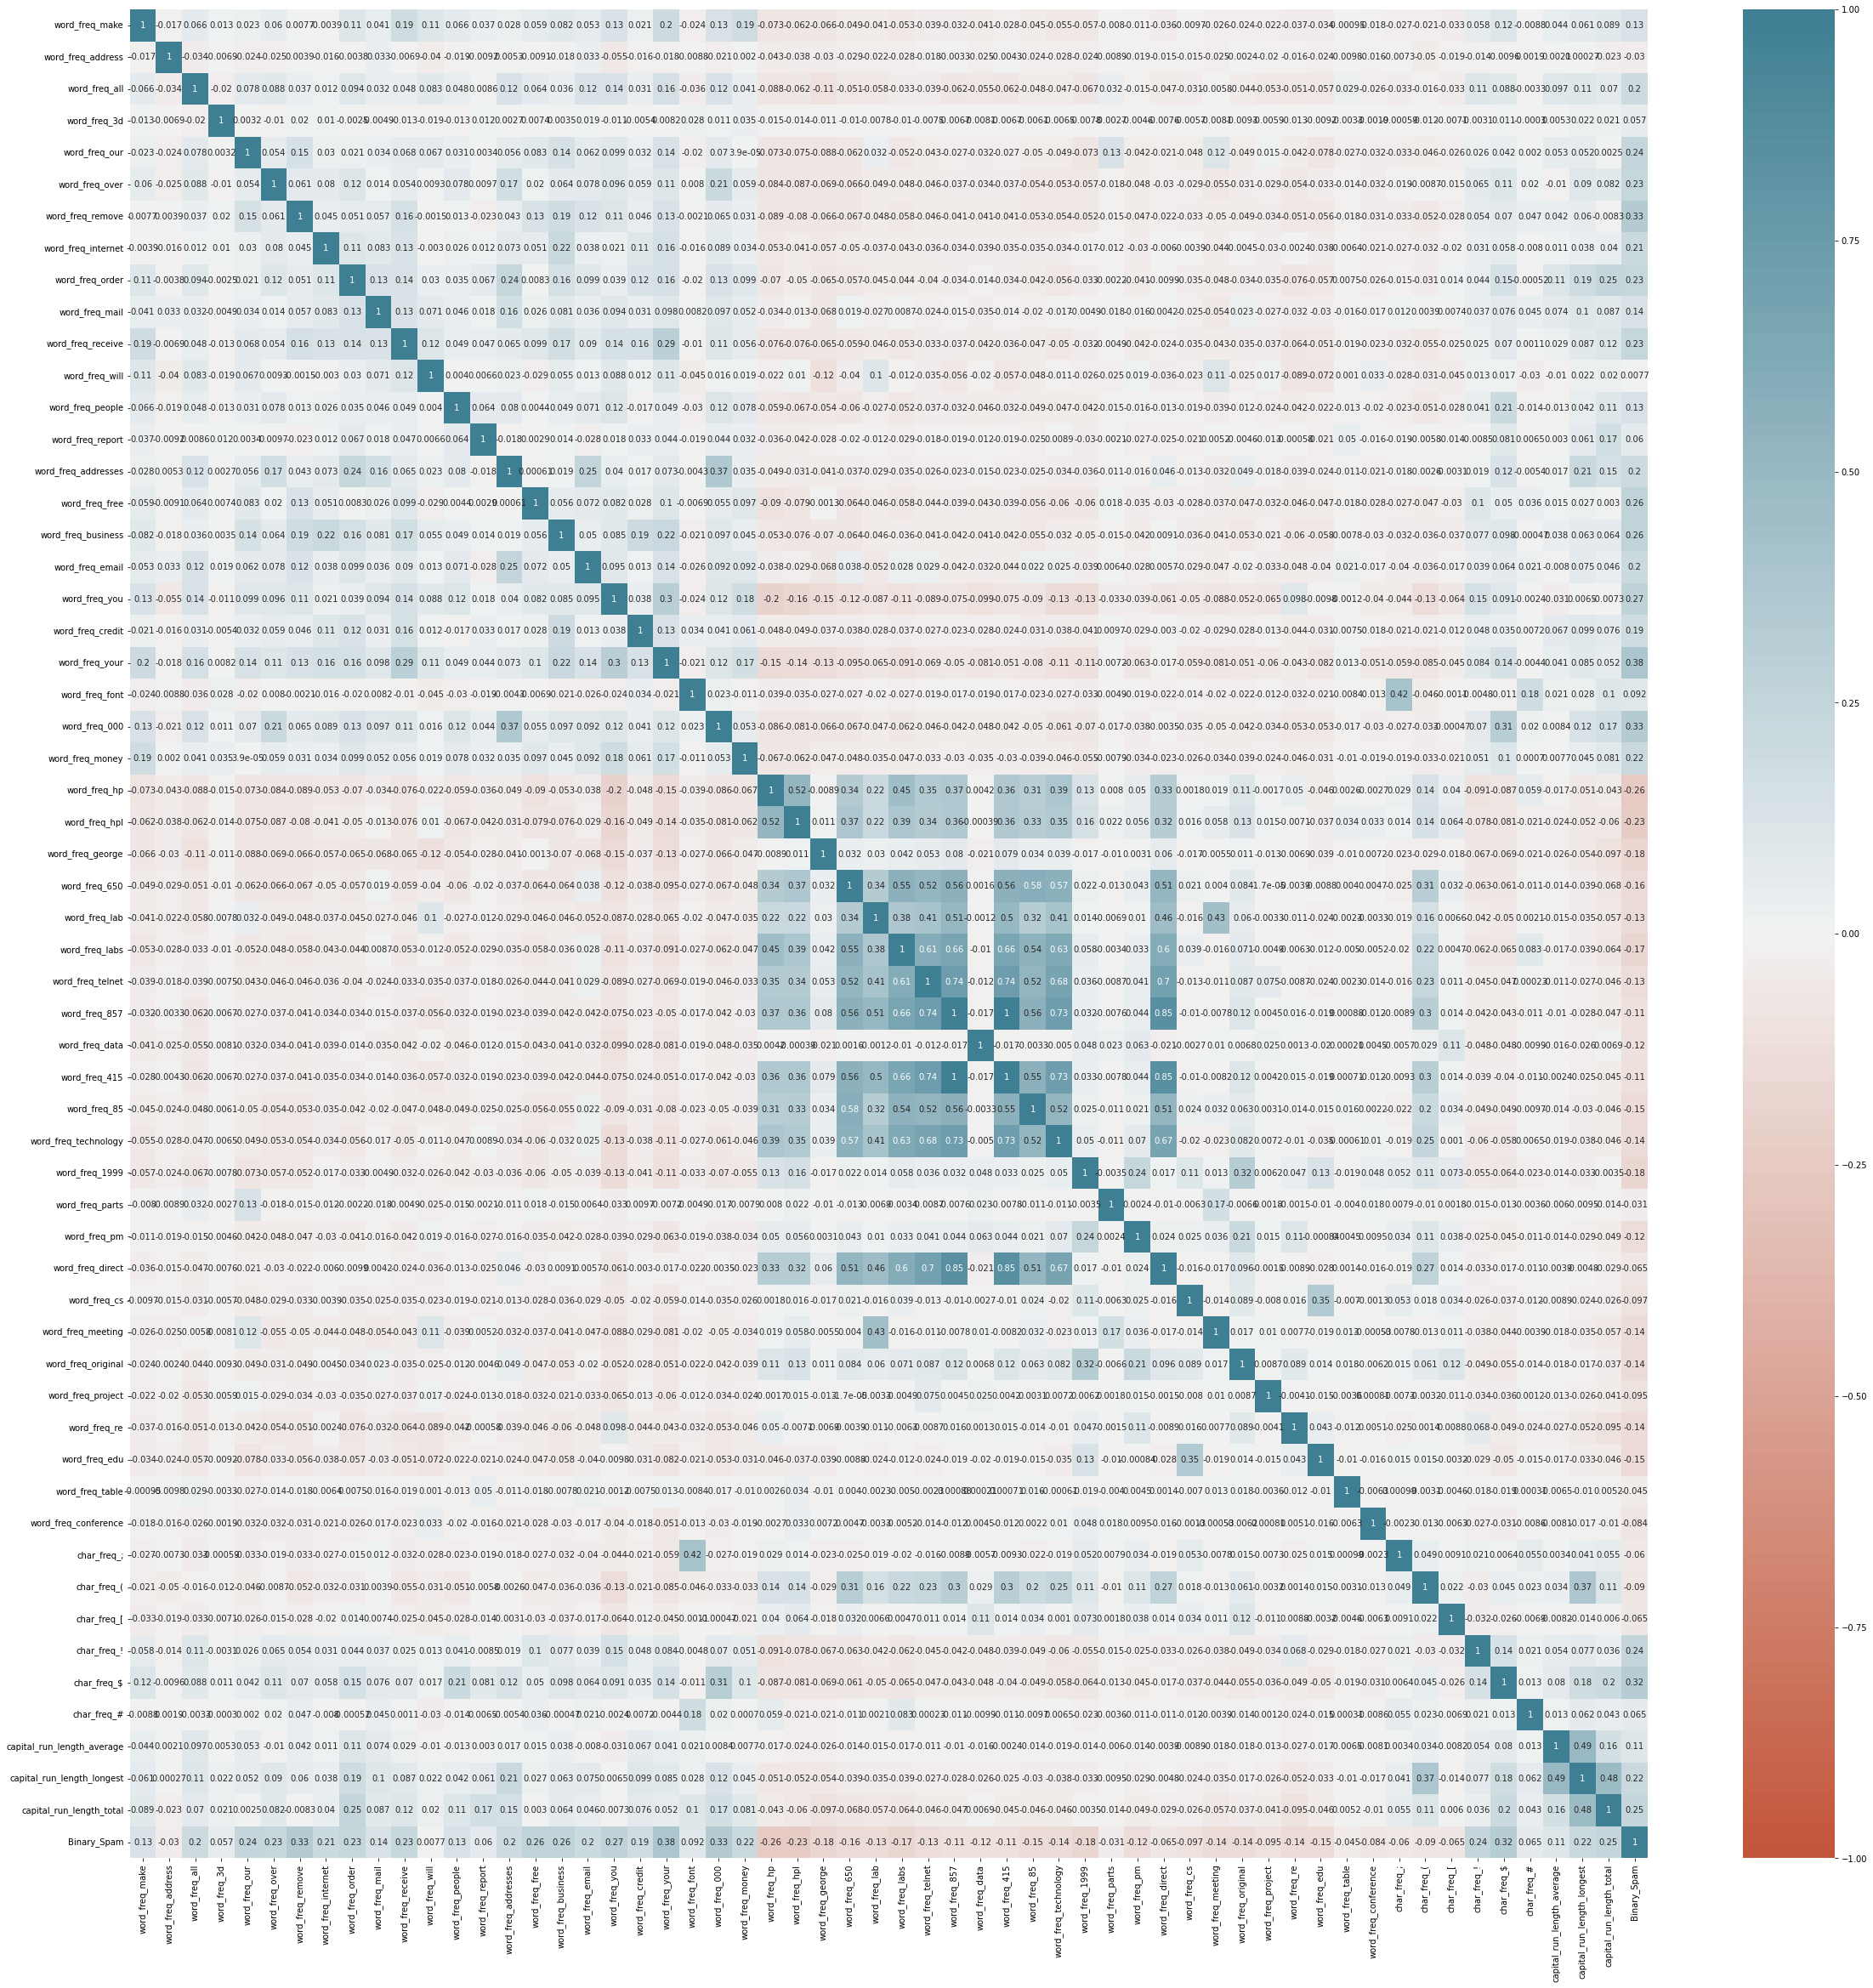

In [107]:
# Delete less relevant features based on the correlation with the output variable
cor = df1.corr()  # calculate correlations

# Correlation graph
plt.figure(figsize=(40, 40))
sns.heatmap(cor, annot=True, cmap=sns.diverging_palette(20, 220, n=200), vmin=-1, vmax=1)
plt.show()

***
### Step 3 - Feature selection based on correlation


Number of features on the original database -  58
Number of features after feature selection -  42 



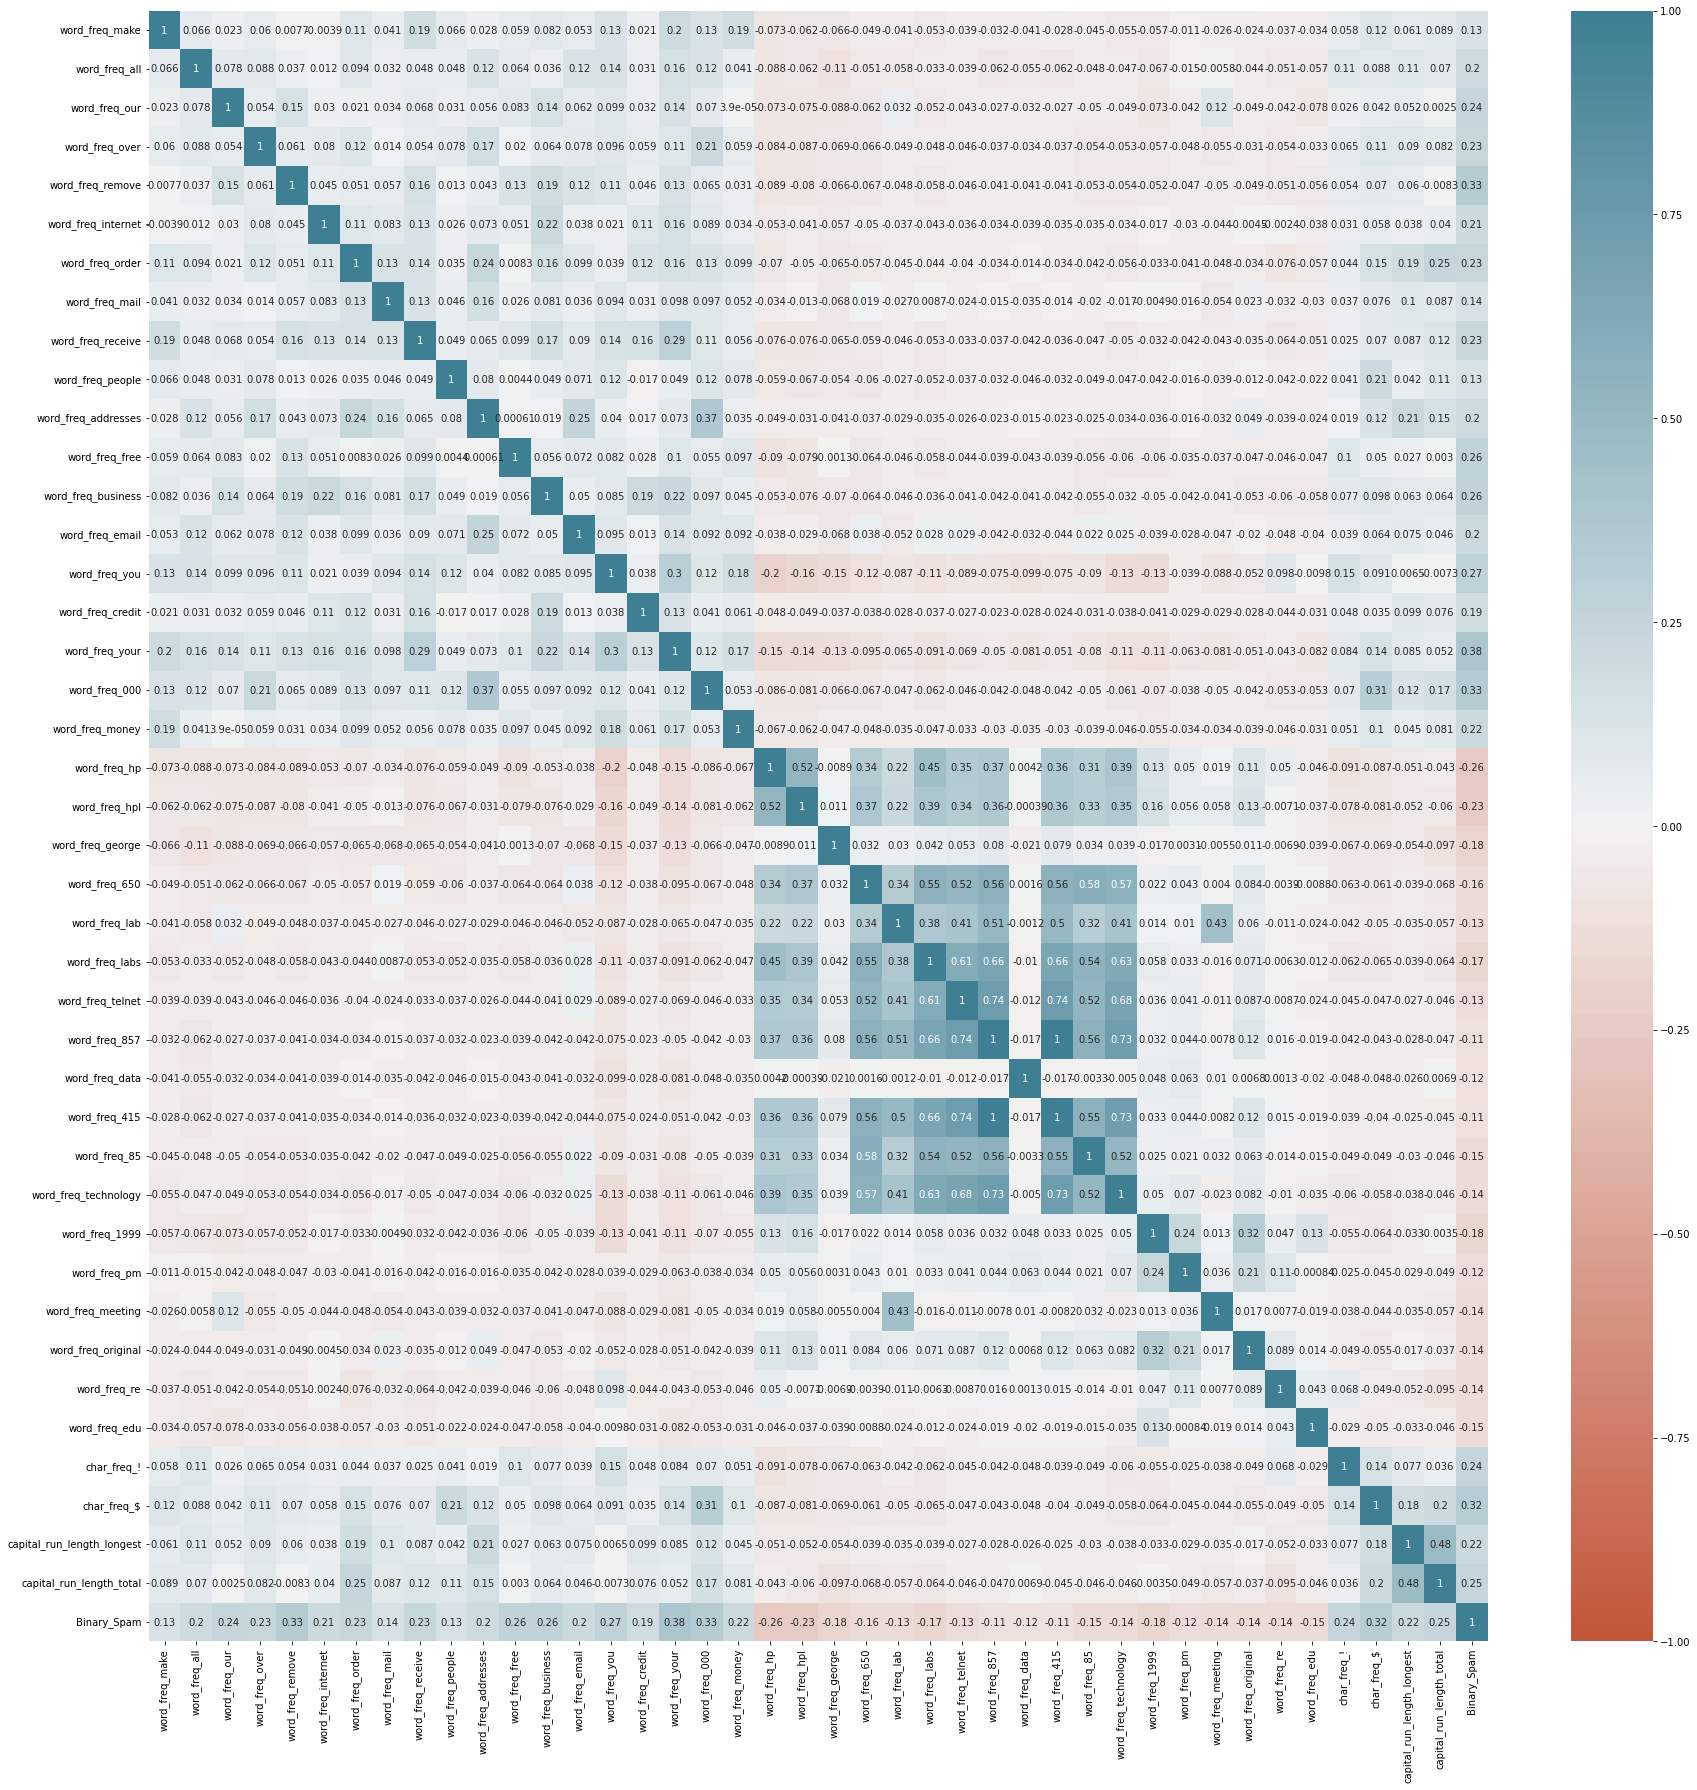

In [108]:
# Correlation with output variable
cor_target = abs(cor["Binary_Spam"])

nr_features = len(df1.columns)

aux = 0
for i in df1.columns:

    if cor_target[aux] < 0.11 or cor_target[aux] > 0.9:  # if two features are too different or too similar to each other, they don't carry information

        if i != "Binary_Spam":
            df1.drop(i, axis=1, inplace=True)

    aux += 1

dfaux = df1.drop("Binary_Spam", axis=1, inplace=False)

feature_cols = dfaux.columns

X = df1[feature_cols]  # features
Y = df1.Binary_Spam

print("\nNumber of features on the original database - ", nr_features)
print("Number of features after feature selection - ", len(df1.columns), "\n")


new_cor = df1.corr()



plt.figure(figsize=(30, 30))
sns.heatmap(new_cor, annot=True, cmap=sns.diverging_palette(20, 220, n=200), vmin=-1, vmax=1)
plt.show()

***
### Step 4 - Use the classifiers

- Random Forest

In [133]:
sumr=0
for i in range(8):    
    rand=rd.randint(0,2**32-1)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=rand)

    # model
    randFor = RandomForestClassifier(n_estimators = 30, max_depth = 20, random_state=rand) 

    # fit the model with data
    randFor.fit(X_train,y_train)
    y_pred=randFor.predict(X_test)

    acc=metrics.accuracy_score(y_test, y_pred)
    #prc=metrics.precision_score(y_test, y_pred)
    #rec=metrics.recall_score(y_test, y_pred)
    print("Accuracy:",acc * 100,"%")
    accuracy_rf = acc * 100
    sumr+=accuracy_rf
sumr/=8
print("Accuracy after 8 runs:",sumr,"%")

Accuracy: 94.85879797248371 %
Accuracy: 94.78638667632151 %
Accuracy: 95.07603186097032 %
Accuracy: 95.2208544532947 %
Accuracy: 93.9174511223751 %
Accuracy: 95.43808834178131 %
Accuracy: 95.00362056480812 %
Accuracy: 95.2208544532947 %
Accuracy after 8 runs: 94.94026068066619 %


- Artificial Neural Networks

 We need to explain why we chose logistic ? because its better?

In [134]:
#Random_state foi dado por mim, para obter um resultado mais proximo do relatório
suma=0
for i in range(8):
    rand=rd.randint(0,2**32-1)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=rand)
    clf = MLPClassifier(activation='tanh',solver='adam', learning_rate='adaptive', random_state=rand, momentum=0.2, learning_rate_init=0.001, max_iter=2000).fit(X_train, y_train)

    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

    print("Accuracy: t ",metrics.accuracy_score(y_test, y_pred) * 100,"%")
    accuracy_ann = metrics.accuracy_score(y_test, y_pred) * 100
    
    clf = MLPClassifier(activation='relu',solver='adam', learning_rate='adaptive', random_state=rand, momentum=0.2, learning_rate_init=0.001, max_iter=2000).fit(X_train, y_train)

    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

    print("Accuracy: r ",metrics.accuracy_score(y_test, y_pred) * 100,"%")
    accuracy_ann = metrics.accuracy_score(y_test, y_pred) * 100
    
    clf = MLPClassifier(activation='logistic',solver='adam', learning_rate='adaptive', random_state=rand, momentum=0.2, learning_rate_init=0.001, max_iter=2000).fit(X_train, y_train)

    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

    print("Accuracy: l ",metrics.accuracy_score(y_test, y_pred) * 100,"%\n")
    accuracy_ann = metrics.accuracy_score(y_test, y_pred) * 100
    
    suma+=accuracy_ann
suma/=8
print("Accuracy after 8 runs:",suma,"%")

Accuracy: t  93.39704604691572 %
Accuracy: r  92.70199826238054 %
Accuracy: l  93.74456993918332 %

Accuracy: t  94.09209383145091 %
Accuracy: r  92.87576020851434 %
Accuracy: l  94.17897480451781 %

Accuracy: t  93.74456993918332 %
Accuracy: r  91.92006950477845 %
Accuracy: l  93.31016507384882 %

Accuracy: t  94.7002606429192 %
Accuracy: r  93.83145091225022 %
Accuracy: l  93.91833188531712 %

Accuracy: t  94.35273675065162 %
Accuracy: r  91.31190269331016 %
Accuracy: l  93.65768896611642 %

Accuracy: t  94.5264986967854 %
Accuracy: r  94.09209383145091 %
Accuracy: l  93.91833188531712 %

Accuracy: t  94.35273675065162 %
Accuracy: r  93.39704604691572 %
Accuracy: l  94.9609035621199 %

Accuracy: t  92.61511728931364 %
Accuracy: r  90.52997393570807 %
Accuracy: l  94.2658557775847 %

Accuracy after 8 runs: 93.99435273675067 %


- Logistic Regression

In [146]:
suml=0
for i in range(8):    
    rand=rd.randint(0,2**32-1)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=rand)

    # instantiate the model (using the default parameters)
    logreg = LogisticRegression(tol=(1*10**-8),max_iter=2000) #1977???

    # fit the model with data
    logreg.fit(X_train,y_train)
    y_pred=logreg.predict(X_test)

    acc=metrics.accuracy_score(y_test, y_pred)
    prc=metrics.precision_score(y_test, y_pred)
    rec=metrics.recall_score(y_test, y_pred)
    print("Accuracy:",acc * 100,"%")
    accuracy_lr = acc * 100
    suml+=accuracy_lr
suml/=8
print("Accuracy after 8 runs:",suml,"%")

Accuracy: 92.10716871832005 %
Accuracy: 92.17958001448226 %
Accuracy: 93.04851556842868 %
Accuracy: 92.68645908761766 %
Accuracy: 91.74511223750905 %
Accuracy: 91.96234612599565 %
Accuracy: 91.74511223750905 %
Accuracy: 93.70021723388848 %
Accuracy after 8 runs: 92.39681390296886 %


- HeatMap showing the last iteration of the Classifier performance

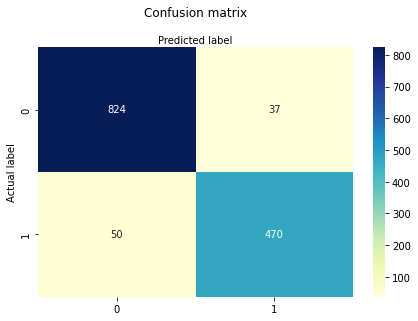

Accuracy  : 0.9370021723388848 

Precision : 0.9570267131242741 

Recall    : 0.9570267131242741 

Fmeasure  : 0.9570267131242741 



In [162]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
#cnf_matrix


class_names=['P','F'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
TP=cnf_matrix[0][0]
FP=cnf_matrix[0][1]
FN=cnf_matrix[1][0]
TN=cnf_matrix[1][1]

P=TP+FN
N=FP+TN

precision=TP/(TP+FP)
accuracy=(TP+TN)/(P+N)
recall=TP/(TP+FP)

Fmeasure=2/((1/precision)+(1/recall))
print("Accuracy  :",accuracy,"\n")
print("Precision :",precision,"\n")
print("Recall    :",recall,"\n")
print("Fmeasure  :",Fmeasure,"\n")

***
### Step 5 - Evaluation of the obtained results

##### Results obtained in the paper
- Random Forest - Accuracy = 95.4575%
- Artificial Neural Networks - Accuracy = 92.4147%
- Logistic Regression - Accuracy = 92.4147%

##### Results obtained in our work

- Random Forest

In [152]:
print("Accuracy = ", sumr,"%")
print("Difference = ", 95.4575 - sumr,"%")

Accuracy =  94.94026068066619 %
Difference =  0.517239319333811 %


- Artificial Neural Networks

In [153]:
print("Accuracy = ", suma,"%")
print("Difference = ", 92.4147 - suma,"%")

Accuracy =  93.99435273675067 %
Difference =  -1.579652736750674 %


- Logistic Regression

In [154]:
print("Accuracy = ", suml,"%")
print("Difference = ", 92.4147 - suml,"%")

Accuracy =  92.39681390296886 %
Difference =  0.017886097031137638 %


***
### Conclusion

The results we obtained in our work are very close to the results the authors of the paper obtained. The feature selection has little effect on the accuracy obtained, however it reduces the number of features analysed by 16, which is better in terms of processing.